# MLP using Numpy

In [ ]:
import numpy as np

class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_to_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.weights_hidden_to_output = np.random.randn(self.hidden_size, self.output_size)

        self.biases_hidden = np.zeros((1, self.hidden_size))
        self.biases_output = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        # Forward pass for the input layer to hidden layer
        self.hidden_layer_input = np.dot(X, self.weights_input_to_hidden) + self.biases_hidden
        self.hidden_layer_output = self.sigmoid(self.hidden_layer_input)

        # Forward pass for the hidden layer to output layer
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_to_output) + self.biases_output
        self.output_layer_output = self.sigmoid(self.output_layer_input)

        return self.output_layer_output

# Example usage:
input_size = 2
hidden_size = 3
output_size = 1

mlp = MLP(input_size, hidden_size, output_size)

# Assuming we have a single input sample with shape (1, 2)
X = np.array([[0.5, 0.7]])
output = mlp.forward(X)
print("Output:", output)

Output: [[0.58129955]]


# MLP using PyTorch

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        return x

# Example usage:
input_size = 2
hidden_size = 3
output_size = 2

mlp = MLP(input_size, hidden_size, output_size)

# Assuming we have a single input sample with shape (1, 2)
input_sample = torch.tensor([[0.5, 0.7]], dtype=torch.float32)
output = mlp(input_sample)
print("Output:", output)

Output: tensor([[0.4519, 0.4577]], grad_fn=<SigmoidBackward0>)


# Dataset

In [ ]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader

class CSVDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.data = pd.read_csv(csv_file)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data.iloc[idx]
        input_data = torch.tensor(sample['input'].values, dtype=torch.float32)
        target = torch.tensor(sample['target'].values, dtype=torch.float32)

        if self.transform:
            input_data = self.transform(input_data)

        return input_data, target

# Data loader

In [ ]:
# Assuming we have a CSV file named 'data.csv' with 'input' and 'target' columns
csv_file = 'data.csv'

# Create an instance of the CSVDataset
dataset = CSVDataset(csv_file)

# Define the transformations (if any)
# For simplicity, let's assume we don't need any transformations
# transform = None

# Create a DataLoader
batch_size = 32
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Iterate over the DataLoader
for batch_idx, (inputs, targets) in enumerate(data_loader):
    # Here, inputs and targets are PyTorch tensors
    # You can perform your training/evaluation steps here
    # ...

    # For demonstration purposes, let's just print the batch size
    print(f"Batch {batch_idx+1}, Batch Size: {inputs.size(0)}")


# Device: CPU / GPU

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
torch.cuda.device_count()

2

In [ ]:
!nvidia-smi

Mon Jul 24 09:37:00 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA RTX A5500                Off| 00000000:17:00.0 Off |                  Off |
| 30%   34C    P8               23W / 230W|    562MiB / 24564MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
torch.cuda.get_device_properties(0),torch.cuda.get_device_properties(1)

(_CudaDeviceProperties(name='NVIDIA RTX A5500', major=8, minor=6, total_memory=24247MB, multi_processor_count=80),
 _CudaDeviceProperties(name='NVIDIA RTX A5500', major=8, minor=6, total_memory=24239MB, multi_processor_count=80))

# Training and Testing a Neural Network for MNIST (handwritten digits) classification
## Dealing with Data: Dataset and Dataloader

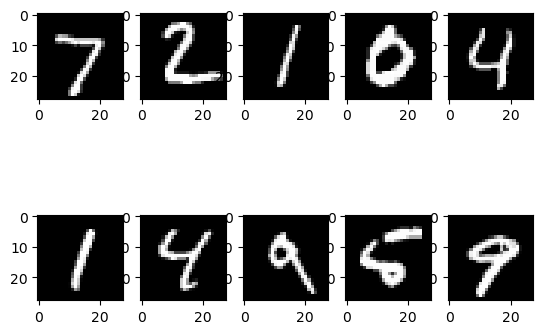

In [ ]:
# hyper-paramters
input_size = 28 * 28
hidden_size = 500 # one hidden layer
n_classes = 10
n_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_set = torchvision.datasets.MNIST(root='./data',
                                       train=True,
                                       transform=transforms.ToTensor(),
                                       download=True)
test_set = torchvision.datasets.MNIST(root='./data',
                                       train=False,
                                       transform=transforms.ToTensor(),
                                       download=True)
# data loader
train_loader = torch.utils.data.DataLoader(dataset=train_set,
                                           batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_set,
                                           batch_size=batch_size,
                                           shuffle=False)

# show some image
images, labels = next(iter(test_loader))
for i in range(10):
    plt.subplot(2, 5, i+1)
    # img = images[i].squeeze(0)
    plt.imshow(images[i][0], cmap='gray')
plt.show()

## Define network, choose loss function, choose optimizer, then start training

In [ ]:
# create our MLP (fully connected nn) with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, out_size):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size)
        self.l2 = nn.Linear(hidden_size, out_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

model = NeuralNet(input_size, hidden_size, n_classes).to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

loss_vec = []
acc_vec= []
# Train the model
n_total_step = len(train_loader)
acc = 0
for epoch in range(n_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # forward pass
        outputs = model(images) # [b_size, 10] operator "()" overload
        _, preds = torch.max(outputs, axis=1) # preds: [b_size, 1]
        loss = criterion(preds, labels) # labels: [b_size, 1]
        acc += (preds == labels).cpu().numpy().mean()

        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            acc_final = acc / (epoch*100 + (i+1)) #not len(train_loader)
            print(f'Epoch {epoch+1}/{n_epochs}, Step {i+1}/{n_total_step},\
            Loss: {loss.item():.4f}, Acc: {acc_final:.3f}')

Epoch 1/2, Step 100/600,            Loss: 0.2137, Acc: 0.835
Epoch 1/2, Step 200/600,            Loss: 0.2160, Acc: 0.874
Epoch 1/2, Step 300/600,            Loss: 0.2115, Acc: 0.892
Epoch 1/2, Step 400/600,            Loss: 0.1464, Acc: 0.905
Epoch 1/2, Step 500/600,            Loss: 0.1138, Acc: 0.913
Epoch 1/2, Step 600/600,            Loss: 0.1705, Acc: 0.919
Epoch 2/2, Step 100/600,            Loss: 0.0938, Acc: 0.925
Epoch 2/2, Step 200/600,            Loss: 0.0979, Acc: 0.930
Epoch 2/2, Step 300/600,            Loss: 0.0727, Acc: 0.934
Epoch 2/2, Step 400/600,            Loss: 0.0955, Acc: 0.938
Epoch 2/2, Step 500/600,            Loss: 0.0557, Acc: 0.940
Epoch 2/2, Step 600/600,            Loss: 0.0994, Acc: 0.943


## Test the network

In [ ]:
# Test the model
model.eval()
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)

        _, preds = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (preds==labels).sum().item()

    acc = n_correct / n_samples
    print(f'Test Accuracy: {acc*100} %')

Test Accuracy: 97.14 %
